In [1]:
#Post Processing 

In [1]:
import damask
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py    
from numpy import newaxis

In [2]:
result = damask.Result('geom_tension-load.hdf5')

In [3]:
result.add_strain()

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [4]:
result.add_stress_Cauchy()

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [5]:
result.add_equivalent_Mises('sigma')

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [6]:
result.add_equivalent_Mises('epsilon_V^0.0(F)')

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [7]:
result.add_IPF_color(np.array([0,0,1]))

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


In [8]:
result

Created by DAMASK_grid v3.0.0-alpha6
        on 2024-07-05 22:44:05+0530
 executing "DAMASK_grid -g geom.vti -l tension-load.yaml"

increment_0 (0.0 s)
  phase
    Primary
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        IPFcolor_(0 0 1) / 8-bit RGB: Inverse Pole Figure (IPF) colors along sample direction (0 0 1)
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        gamma_sl / 1: plastic shear
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM / Pa: Mises equivalent stress of sigma (Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (def

In [9]:
#for index in range(5,200,5):
    #cur_res = res.view(increments = index)
    #cur_res.add_stress_Cauchy()
    #cur_res.add_strain()
    #cur_res.add_equivalent_Mises('sigma')
    #cur_res.add_stress_Cauchy('epsilon_V^0.0(F)')
    #cur_res

In [10]:
result.view('increments',-1)

Created by DAMASK_grid v3.0.0-alpha6
        on 2024-07-05 22:44:05+0530
 executing "DAMASK_grid -g geom.vti -l tension-load.yaml"

increment_100 (200.0 s)
  phase
    Primary
      mechanical
        F / 1: deformation gradient
        F_e / 1: elastic deformation gradient
        F_p / 1: plastic deformation gradient
        IPFcolor_(0 0 1) / 8-bit RGB: Inverse Pole Figure (IPF) colors along sample direction (0 0 1)
        O / q_0 (q_1 q_2 q_3): crystal orientation as quaternion
        P / Pa: first Piola-Kirchhoff stress
        epsilon_V^0.0(F) / 1: strain tensor of F (deformation gradient)
        epsilon_V^0.0(F)_vM / 1: Mises equivalent strain of epsilon_V^0.0(F) (strain tensor of F (deformation gradient))
        gamma_sl / 1: plastic shear
        sigma / Pa: Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F (deformation gradient)
        sigma_vM / Pa: Mises equivalent stress of sigma (Cauchy stress calculated from P (first Piola-Kirchhoff stress) and F 

In [11]:
result.export_VTK()

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


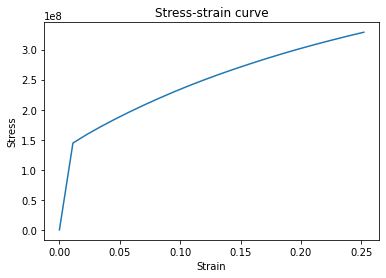

In [12]:
sig_sim=[np.average(s) for s in result.get('sigma_vM').values()]
eps_sim=[np.average(e) for e in result.get('epsilon_V^0.0(F)_vM').values()]
plt.plot(eps_sim, sig_sim)
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-strain curve')
plt.savefig('SS_Curve_F1.05_T10_N40.png')


In [13]:
#for index in range(0, 81, 10):
    #res =result.view(increments=index)
    #gamma_sl = res.get('gamma_sl')
    #pd.DataFrame(gamma_sl).to_csv("Increment"+ str(index) +"gamma_sl.csv")


In [14]:
# for last increment
for index in range(1,21):
    res =result.view(increments=result.increments[index])
    O = res.place('O')
    euler = damask.Rotation.from_quaternion(O.data).as_Euler_angles(degrees=True)
    pd.DataFrame(euler).to_csv(f"IPF_Final_{index}.csv")

In [15]:
res =res.view(increments=res.increments[0])
O = res.place('O')
euler = damask.Rotation.from_quaternion(O.data).as_Euler_angles(degrees=True)
pd.DataFrame(euler).to_csv("IPF_Initial.csv")